In [172]:
import numpy as np
import pandas as pd


In [173]:
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [174]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [175]:
# categorical
# nominal - survived, Name, sex, embarked
# ordinal - pclass, 

In [176]:
# numerical
# continuous- Age, fare
# discrete -  sibsp, parch

In [177]:
# mix datatype
# ticket, cabin

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [179]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


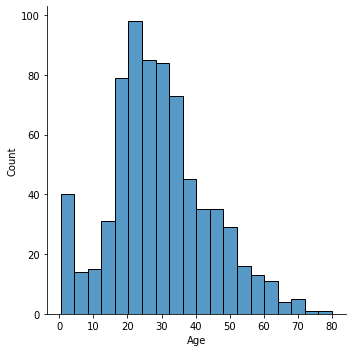

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(df['Age'])

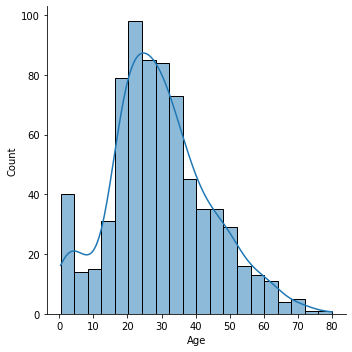

In [181]:
sns.displot(df['Age'], kde=True)

<Figure size 864x432 with 0 Axes>

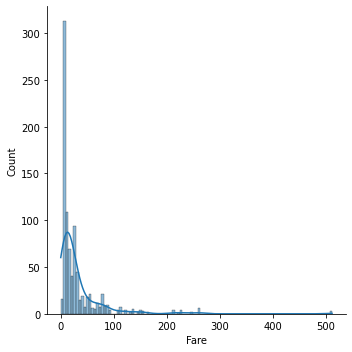

In [182]:
plt.figure(figsize=(12, 6))
sns.displot(df['Fare'], kde=True)

In [183]:
df[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [184]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [185]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [186]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [187]:
# C = Cherbourg, Q = Queenstown, S = Southampton
df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


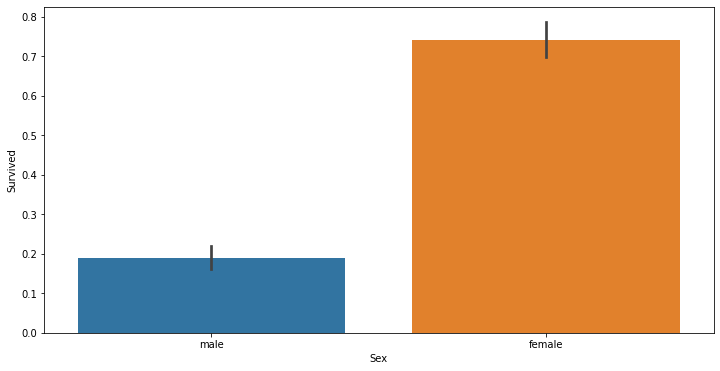

In [188]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sex', y='Survived', data=df)

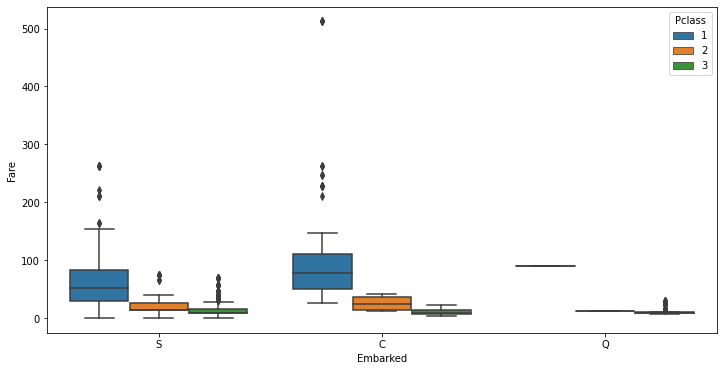

In [189]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=df)

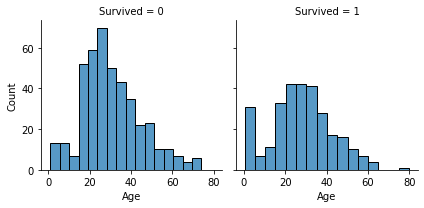

In [190]:
Agewise = sns.FacetGrid(df, col='Survived')
Agewise.map(sns.histplot, 'Age')

<Figure size 864x432 with 0 Axes>

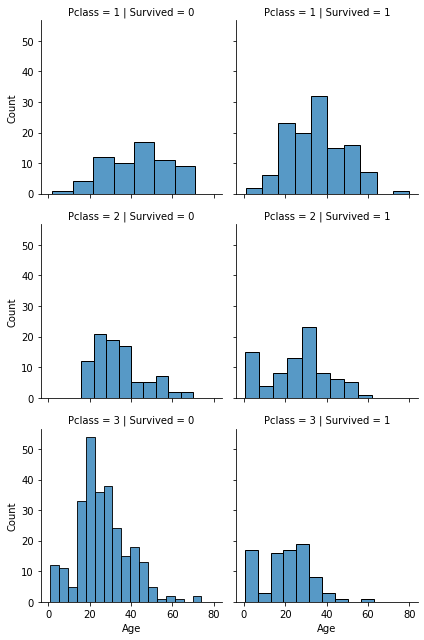

In [191]:
plt.figure(figsize=(12, 6))
classwise = sns.FacetGrid(df, col='Survived', row='Pclass')
classwise.map(sns.histplot, 'Age')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


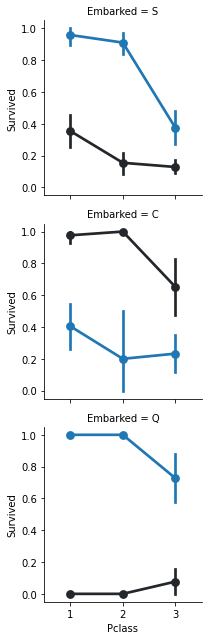

In [192]:
embarkedwise = sns.FacetGrid(df, row='Embarked')
embarkedwise.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


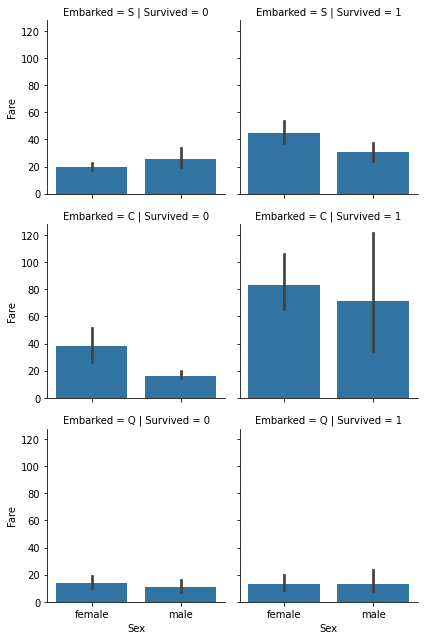

In [193]:
Farewise = sns.FacetGrid(df, row='Embarked', col='Survived')
Farewise.map(sns.barplot, 'Sex', 'Fare')

In [194]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [195]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [196]:
df1 = df.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1)

In [197]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [198]:
print(df1['Age'].mean())
print(df1['Age'].median())

29.69911764705882
28.0


In [199]:
df1['Age'] = df1['Age'].fillna(df1['Age'].median())


In [200]:
df1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [201]:
df1['Embarked'].mode()[0]

'S'

In [202]:
df1['Embarked'] = df1['Embarked'].fillna(df1['Embarked'].mode()[0])

In [203]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [204]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [205]:
df1['Sex'] = df1['Sex'].map({'male': 0, 'female': 1})

In [206]:
df1['Embarked'] = df1['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [207]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [208]:
X = df1.drop('Survived', axis=1)
y = df1['Survived']

In [209]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [210]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [211]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [212]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [213]:
logreg.score(X_train, y_train)

0.7993579454253612

In [214]:
round(logreg.score(X_train, y_train)*100, 2)

79.94

In [215]:
round(logreg.score(X_test, y_test)*100, 2)

80.6

In [216]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=3)

rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [217]:
round(rfc.score(X_train, y_train)*100, 2)

83.95

In [218]:
round(rfc.score(X_test, y_test)*100, 2)

80.97

In [219]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [220]:
df2 = df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

In [221]:
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [222]:
df2['Name'].str.extract('([A-Za-z]+)\.', expand=False)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [223]:
df2['Title'] = df2['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [224]:
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [225]:
df2['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [226]:
df2['Title'] = df2['Title'].replace(['Lady', 'Countess', 'Capt', 'Don', 'Dr',
                                     'Jonkheer', 'Major', 'Col', 'Rev', 'Sir'], 'Rare')

In [227]:
df2['Title'] = df2['Title'].replace(['Mme', 'Ms', 'Mlle'], 'Mrs')

In [228]:
df2['Title'].value_counts()

Mr        517
Miss      182
Mrs       129
Master     40
Rare       23
Name: Title, dtype: int64

In [229]:
df2[['Title', 'Survived']].groupby(['Title']).mean()

,Survived
Title,
Master,0.575000
Miss,0.697802
Mr,0.156673
Mrs,0.798450
Rare,0.347826


In [230]:
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [231]:
df2['Title'] = df2['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})

df2["Sex"] = df2["Sex"].map({"male": 0, "female": 1})


In [232]:
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1


In [233]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
 9   Title     891 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


In [234]:
df2 = df2.drop("Name", axis=1)

In [235]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [237]:
df2['Familysize'] = df2['SibSp'] + df2['Parch'] + 1

In [238]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize
0,0,3,0,22.0,1,0,7.2500,S,1,2
1,1,1,1,38.0,1,0,71.2833,C,3,2
2,1,3,1,26.0,0,0,7.9250,S,2,1
3,1,1,1,35.0,1,0,53.1000,S,3,2
4,0,3,0,35.0,0,0,8.0500,S,1,1


In [239]:
df2 = df2.drop(['SibSp', 'Parch'], axis=1)

In [240]:
df2.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Familysize
0,0,3,0,22.0,7.2500,S,1,2
1,1,1,1,38.0,71.2833,C,3,2
2,1,3,1,26.0,7.9250,S,2,1
3,1,1,1,35.0,53.1000,S,3,2
4,0,3,0,35.0,8.0500,S,1,1


In [241]:
df2['Age'] = df2['Age'].fillna(df2['Age'].median())
df2['Embarked'] = df2['Embarked'].fillna(df2['Embarked'].mode()[0])

In [242]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    object 
 6   Title       891 non-null    int64  
 7   Familysize  891 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [243]:
df2['Embarked'] = df2['Embarked'].map({"S": 0, "C": 1, "Q": 2})

In [244]:
df2.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Familysize
0,0,3,0,22.0,7.2500,0,1,2
1,1,1,1,38.0,71.2833,1,3,2
2,1,3,1,26.0,7.9250,0,2,1
3,1,1,1,35.0,53.1000,0,3,2
4,0,3,0,35.0,8.0500,0,1,1


In [245]:
X = df2.drop('Survived', axis=1)
y = df2['Survived']

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [247]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Familysize
445,1,0,4.0,81.8583,0,4,3
650,3,0,28.0,7.8958,0,1,1
172,3,1,1.0,11.1333,0,2,3
450,2,0,36.0,27.7500,0,1,4
314,2,0,43.0,26.2500,0,1,3


In [248]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Familysize
709,3,0,28.0,15.2458,1,4,3
439,2,0,31.0,10.5000,0,1,1
840,3,0,20.0,7.9250,0,1,1
720,2,1,6.0,33.0000,0,2,2
39,3,1,14.0,11.2417,1,2,2


In [249]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [250]:
logreg.score(X_train, y_train)

0.8154093097913323

In [251]:
logreg.score(X_test, y_test)

0.7985074626865671

In [252]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=3)

rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [253]:
rfc.score(X_train, y_train)

0.8314606741573034

In [254]:
rfc.score(X_test, y_test)

0.832089552238806